<a href="https://colab.research.google.com/github/sherifmost/Topology_Mapping/blob/main/Topology_Mapping_Ahmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initilizing

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from google.colab import drive
import networkx as nx
from random import randint
from sklearn.cluster import KMeans
import math 

In [ ]:
path = '/content/drive/My Drive/Topology Dataset/Dataset';
delim = '/';
txt_ext = ".txt";
topology_10 = "t_10_";
topology_50 = "t_50_";
topology_100 = "t_100_";
ground_txt = "ground_truth";

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# unzipping the data zip file run once
!unzip '/content/drive/My Drive/Topology Dataset/Dataset.zip' -d '/content/drive/My Drive/Topology Dataset'

Archive:  /content/drive/My Drive/Topology Dataset/Dataset.zip
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/ground_truth.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_0.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_1.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_2.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_3.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_4.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_5.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_6.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_7.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_8.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_9.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_100_0.txt  
  inflating: /content/drive/My

#Dataset

functions used to get the graph data and cluster values from the dataset text files

In [ ]:
# function takes read lines from text file and return an array with this data
def get_file_data(lines):
  data = []
  for line in lines:
    numbers = []
    for num in line.split():
      numbers.append(int(num))
    data.append(np.array(numbers))
  data = np.array(data)
  return data;

In [ ]:
# function used to read the graph data from the text files
def get_data():
  data = []
  for i in range(0,10):
    file = open(path + delim + topology_10 + str(i) + txt_ext,"r")
    lines = file.readlines()
    data.append(get_file_data(lines))
  for i in range(0,10):
    file = open(path + delim + topology_50 + str(i) + txt_ext,"r")
    lines = file.readlines()
    data.append(get_file_data(lines))
  for i in range(0,10):
    file = open(path + delim + topology_100 + str(i) + txt_ext,"r")
    lines = file.readlines()
    data.append(get_file_data(lines))
  return data;

In [ ]:
# function used to get the cluster values from the dataset
def get_ground_truth():
  ground_truth = []
  file = open(path + delim + ground_txt + txt_ext,"r")
  lines = file.readlines()
  ground_truth.append(get_file_data(lines))
  return np.array(ground_truth);

In [ ]:
data = get_data()
ground_truth = get_ground_truth()

In [ ]:
gt=ground_truth[0][1]
print(gt)#cluster values of t_50_5
dd=data[1]
print("from " + str(dd[0][0]) + " to " + str(dd[0][1]) + " weight " + str(dd[0][2]))#topology t_50_5
for i in dd:
  print(i)

[0 0 0 1 1 1 1 0 0 0]
from 9 to 1 weight 666
[  9   1 666]
[  6   7 235]
[  8   1 243]
[  4   3 777]
[  4  10 140]
[  7   8 366]
[  4   5 146]
[  5   7 149]
[  9   7 913]
[  2   6 639]
[  4   5 378]
[  4   5 327]
[  5   8 581]
[  9   8 940]
[  8   9 720]
[  7   8 242]
[  8   4 828]
[  7   5 966]


#Visualize the Topologies

function to create random colors used to set nodes of same cluster with same color

In [ ]:
def get_node_colors(node_values):
  colors = []
  node_colors = []
  n = node_values.size
  for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
  for value in node_values:
    node_colors.append(colors[value])
  return node_colors;

function used to initialize the graph given t_(nodes_num)_(topology_num),
nodes_num is the number of nodes in the graph (10 or 50 or 100)
topology_num is the number of the sample used (0 - 9)

In [ ]:
def set_graph(nodes_num, topology_num):
  # calculating n to get the index of the graph data and clustering values
  n = 0
  if (nodes_num == 50):
    n += 10
  elif (nodes_num == 100):
    n += 20
  n += topology_num
  graph_data = data[n]
  # filling graph nodes and edges with weights
  g = nx.Graph()
  for i in range(1,nodes_num + 1):
    g.add_node(i)
  for edge in graph_data:
    g.add_edge(edge[0],edge[1],weight = edge[2])
  return g;

Visualization function takes number of nodes (10,50,100) and topology sample number (0-9) and draws the graph after and before clustering with random values used for now

In [ ]:
def visualize_topology(g, cluster_values= np.array([0,1,0,0,1,2,0,2,1,1])):
  ###cluster_values = ground_truth[0][n]
  #cluster_values = np.array([0,1,0,0,1,2,0,2,1,1])
  pos_value = nx.circular_layout(g)
  # visulaization before clustering
  plt.figure(figsize = (15, 10))
  nx.draw_networkx_nodes(g, pos = pos_value)
  nx.draw_networkx_labels(g, pos = pos_value)
  nx.draw_networkx_edges(g, pos = pos_value)
  nx.draw_networkx_edge_labels(g, pos = pos_value,edge_labels = nx.get_edge_attributes(g,'weight'))
  plt.show()
  # visualization after clustering
  plt.figure(figsize = (15, 10))
  nx.draw_networkx_nodes(g, pos = pos_value, node_color = get_node_colors(cluster_values))
  nx.draw_networkx_labels(g, pos = pos_value)
  nx.draw_networkx_edges(g, pos = pos_value)
  nx.draw_networkx_edge_labels(g, pos = pos_value,edge_labels = nx.get_edge_attributes(g,'weight'))
  plt.show()
  return;

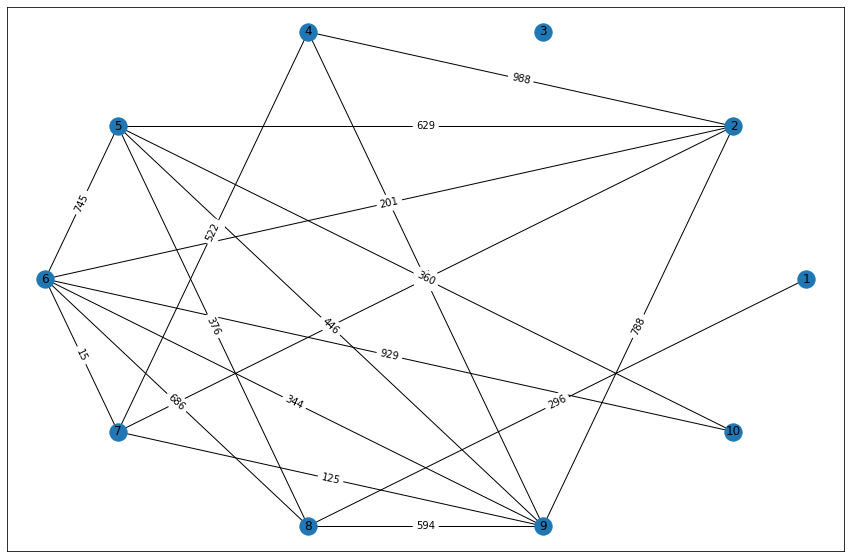

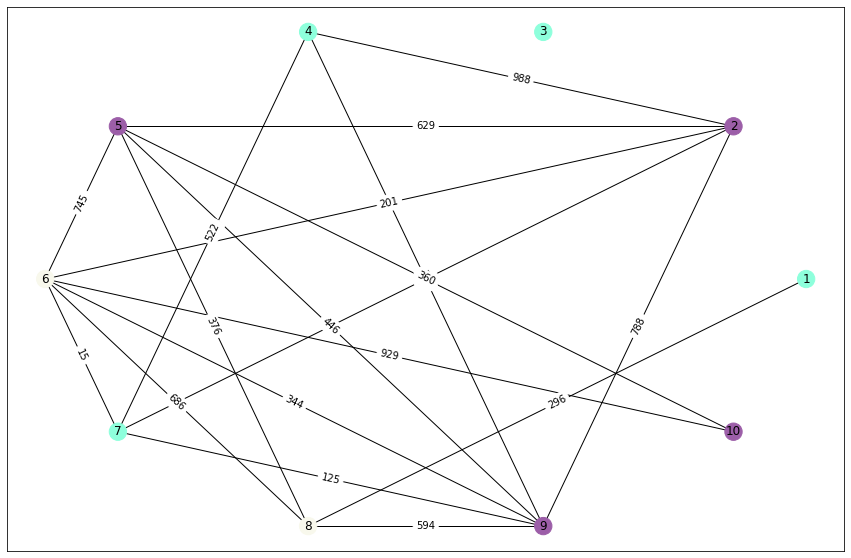

In [ ]:
g = set_graph(10,0)
visualize_topology(g)

#Topology Mapping

Function implementing the spectral clustering algorithm, returning k clusters used to represesnt the nodes in the graph

In [130]:
def spectral_clustering(g, k):
  # Adjacency Matrix (Similarity Matrix)
  W = nx.adjacency_matrix(g)
  A = W.todense()
  # Degree Matrix
  D = np.diag(np.sum(np.array(W.todense()), axis=1))
  # Laplacian Matrix - symmetric matrix
  L = D - A
  # eigenvalues and eigenvectors
  e, v = np.linalg.eig(L)
  # As dominant eigen vectors should be taken according to the magnitude of eigen values 
  # (as negative values only indicate reverse of the vector direction), we should consider the
  # absolute value of the eigen values.
  e = np.absolute(e);
  # using argsort to get dominant eigen vectors according to largest eigen values
  sorted_indecies = e.argsort()[::-1];
  v = v[:,sorted_indecies];
  # when checking the results, eigen vectors may include imaginary parts.
  # we are only concerned with the real parts
  v = np.real(v);
  U = np.array(v[:, :k])
  km = KMeans(init='k-means++', n_clusters=k)
  km_clustering = km.fit_predict(U)
  cluster_values = np.array(km.labels_)
  return cluster_values;

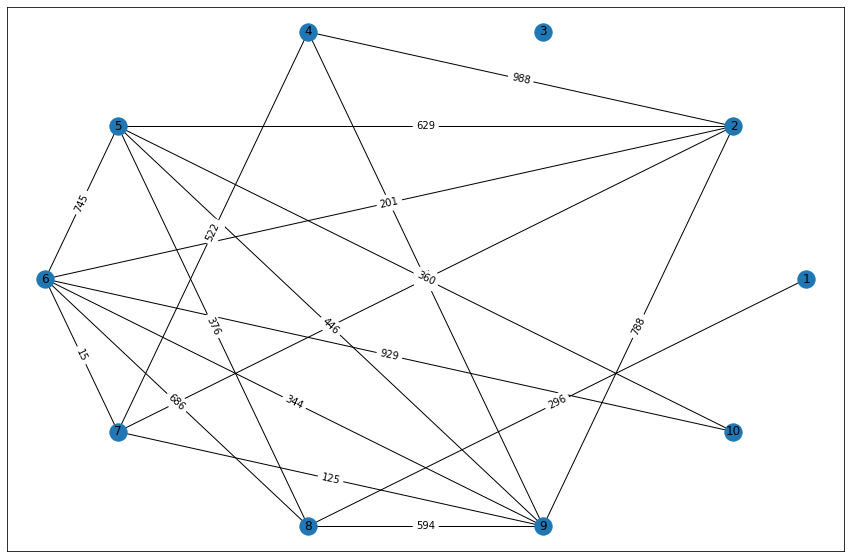

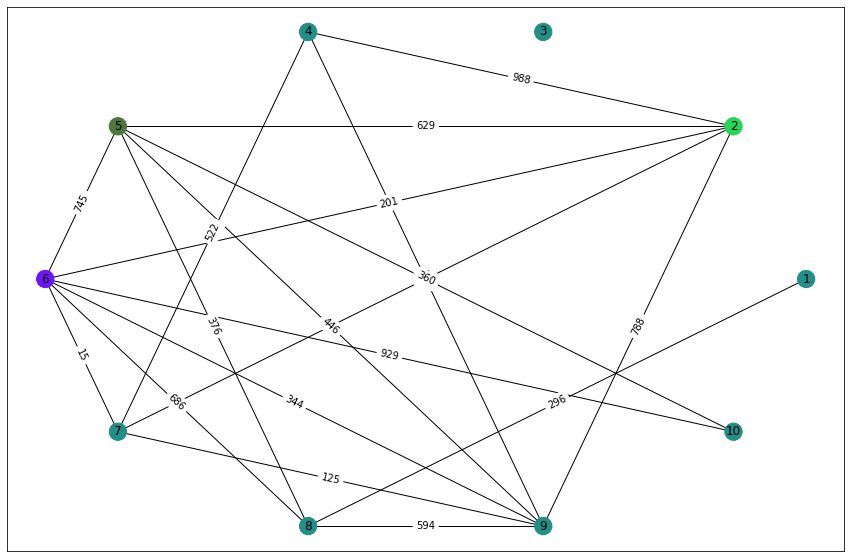

In [137]:
cluster_values = spectral_clustering(g,4)
visualize_topology(g, cluster_values)

# Evaluation

### External evaluation technique - F Measure

In [136]:
def f_measure(cluster_values, gt_values):
  nodes_num = cluster_values.shape[0]
  # clusters start with zero, so we add one to consider all clusters
  clusters_num = np.max(cluster_values) + 1 
  gt_cluster_num = np.max(gt_values) + 1
  # mapping the cluster values with the ground truth data - classes used to distinct the nodes in each cluster
  nodes_clusters = np.zeros((clusters_num,gt_cluster_num))
  # calculating number of nodes in cluster k belongs to which class(ground truth)
  for i in range(nodes_num):
    nodes_clusters[cluster_values[i],gt_values[i]] += 1
  # looping over k clusters to calculate the needed parameters for F score
  F_score = 0
  for cluster in nodes_clusters:
    # total nodes in th ecluster, used to calculate the precision
    total_cluster_nodes = np.sum(cluster)
    # number of class containing the largest number of nodes in the cluster, used to get total number of nodes in this class in all clusters
    max_class_index = np.argmax(cluster)
    # total number of nodes in this class in all clusters
    total_class_nodes = np.sum(nodes_clusters[:,max_class_index],axis=0)
    # calculating precision, recall and F values according using given rules
    precision = cluster[max_class_index] / total_cluster_nodes
    recall = cluster[max_class_index] / total_class_nodes
    F = (2 * precision * recall) / (precision + recall)
    F_score += F
  # the required f measure
  F_score = F_score / clusters_num
  return F_score;

### External evaluation technique - Conditional Entropy

In [ ]:
def conditional_entropy(cluster_values, gt_values):
  nodes_num = cluster_values.shape[0]
  # clusters start with zero, so we add one to consider all clusters
  clusters_num = np.max(cluster_values) + 1 
  gt_cluster_num = np.max(gt_values) + 1
  # mapping the cluster values with the ground truth data - classes used to distinct the nodes in each cluster
  nodes_clusters = np.zeros((clusters_num,gt_cluster_num))
  # calculating number of nodes in cluster k belongs to which class(ground truth)
  for i in range(nodes_num):
    nodes_clusters[cluster_values[i],gt_values[i]] += 1
  # H stores values conditional entropy of T for each cluster
  H = np.zeros(clusters_num)
  H_total = 0
  # varaiable used to index H for each cluster
  k = 0
  for cluster in nodes_clusters:
    # total nodes in th ecluster, used to calculate the entropy
    total_cluster_nodes = np.sum(cluster)
    for n in cluster:
      if (n != 0):
        H[k] -= (n / total_cluster_nodes) * math.log2(n / total_cluster_nodes)
    # reuired entropy value
    H_total += (total_cluster_nodes / nodes_num) * H[k]
    k = k + 1
  return H_total;

### Internal evaluation technique - Normalized Cut

In [128]:
def normalized_cut(nodes_num, topology_num, cluster_values):
  distances = get_distances(nodes_num, topology_num)
  # distances is symmetic, so we sum it on any axis
  total_distances = np.sum(distances,axis = 0)
  clusters_num = np.max(cluster_values)
  NC = 0;
  for cluster_k in range(clusters_num + 1):
    # array contains ones in the indeces of the nodes belongs to the cluster k 
    c_k = np.array(cluster_values == cluster_k,dtype=int)
    # W(Ci,Ci): Sum of initernal distances in cluster k
    W = c_k @ distances @ c_k.T
    # W(Ci,Ci'): Sum of distances of all external edges
    W_comp = (total_distances @ c_k.T) - W
    # add to the total as defined in the equation
    NC += (W_comp)/(W + W_comp)
  return NC;

function returns matrix contains distances between nodes

In [126]:
def get_distances(nodes_num, topology_num):
  # calculating n to get the index of the graph data and clustering values
  n = 0
  if (nodes_num == 50):
    n += 10
  elif (nodes_num == 100):
    n += 20
  n += topology_num
  graph_data = data[n]
  # matrix contains distance between nodes
  distances = np.zeros((nodes_num+1,nodes_num+1))
  for edge in graph_data:
    distances[edge[0]][edge[1]] = math.exp(-0.01 * edge[2])
    distances[edge[1]][edge[0]] = distances[edge[0]][edge[1]]
  distances = distances[1:,1:]
  return distances;

Script running for topology of size 10, sample number 0

In [140]:
# ground_truth[0][n] - n from 0 to 9 is t_10, from 10 to 19 is t_50, from 20 to 29 is t_100
# if t_50_0 then ground_truth[0][10]
print("F measure")
print(f_measure(cluster_values, ground_truth[0][0]))
print("conditional Entropy")
print(conditional_entropy(cluster_values, ground_truth[0][0]))
print("Normalization Cut") 
print(normalized_cut(10, 0, cluster_values)) 

F measure
0.8166666666666667
conditional Entropy
1.2896596952239758
Normalization Cut
3.536251957834883
